In [1]:
import warnings
warnings.filterwarnings('ignore')
#to avoid warnings in th entire code

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
data = pd.read_csv(r'file:///C:\Users\Admin\AppData\Local\Temp\Rar$DIa22092.43269\dreaddit-train.csv')
data.head(2)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.125,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857


In [4]:
data_test = pd.read_csv(r'file:///C:\Users\Admin\AppData\Local\Temp\Rar$DIa22092.47117\dreaddit-test.csv')
data_test.head(2)

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0,1.200,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4,1.125,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909


In [5]:
data1 = data['text'].str.lower()
data1.head(2)

0    he said he had not felt that way before, sugge...
1    hey there r/assistance, not sure if this is th...
Name: text, dtype: object

In [6]:
data2 = data1.values.tolist() 

In [7]:
import numpy as np 
#numpy is to be imported to perform all mathematical funstions
from subprocess import check_output
#sub process returns a completed process
from wordcloud import WordCloud, STOPWORDS
#importing the word cloud module
#importing the list of stopwords so that they can be removed later as they add no meaning to a sentence

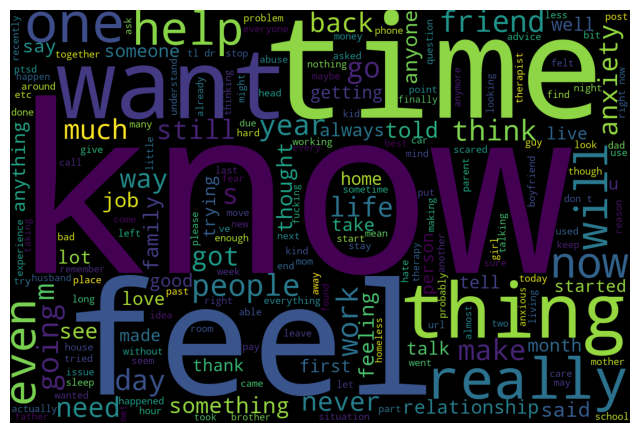

In [8]:
word_string="".join(data2)
#all the abstracts are considered together that were in separate rows
#all the words are converted to lowercase


wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='black', 
                stopwords = STOPWORDS,
               min_font_size = 11).generate(word_string)
plt.figure(figsize = (8, 10)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

In [9]:
#python -m textblob.download_corpora       
from textblob import TextBlob #For Sentiment Anlysis
from itertools import islice #To iterate and slice the tuple read from the file

In [10]:
data3 = data[['text']]

In [11]:
COLS = ['text', 'sentiment','subjectivity','polarity'] #create dataframe COLS

In [12]:
df = pd.DataFrame(columns=COLS)

In [13]:
for index, row in islice(data3.iterrows(), 0, None):
    new_entry = []
    text = (index, row['text'])
    text_str = str(text)
    text_lower = text_str.lower()
    blob = TextBlob(text_lower)  #TextBlob Library aims to provide access to common text-processing operations through a familiar interface
    #You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing (https://textblob.readthedocs.io/en/dev/quickstart.html)
    sentiment = blob.sentiment 
    #The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). 
    #Subjectivity - In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations (Banfield, 1982; Wiebe, 1994) and thus incorporates sentiment
    #The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
    #Polarity - whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral.
    # Polarity is based on or influenced by personal feelings, tastes, or opinions. The polarity score is a float within the range [-1.0, 1.0]. 
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    #if the polarity is >0, it is considered positive, <0 -is considered negative and ==0 is considered neutral
    
    # make a new entry with Comment in lower case, sentiment, subjectivity, and polarity
    new_entry += [text_lower,sentiment,subjectivity,polarity] # =+ is a compund operator that adds to the variable and then returns the same
        
    single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
    df = df.append(single_survey_sentimet_df, ignore_index=True)

In [14]:
df.to_csv('SentimentPolarity_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")
df.head(2)

,text,sentiment,subjectivity,polarity
0,"(0, 'he said he had not felt that way before, ...","(-0.0027417027417027434, 0.4266130694702123)",0.426613,-0.002742
1,"(1, ""hey there r/assistance, not sure if this ...","(0.29285714285714287, 0.5749559082892417)",0.574956,0.292857


In [15]:
dffilter = df.loc[(df.loc[:, df.dtypes != object] != 0).any(1)]

Text(0, 0.5, 'Range')

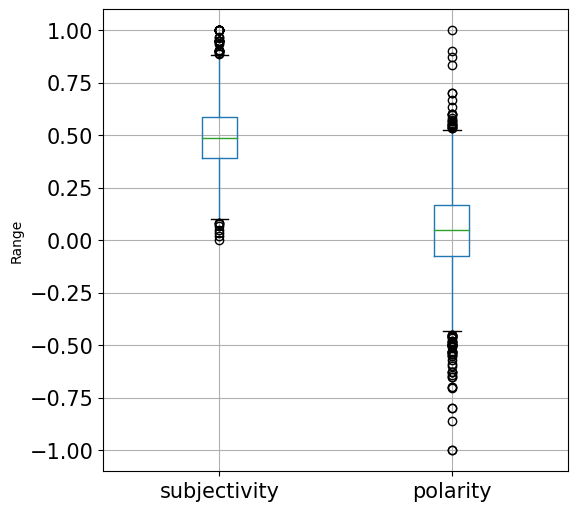

In [16]:
boxplot = dffilter.boxplot(column=['subjectivity','polarity'], 
                     fontsize = 15,grid = True, vert=True,figsize=(6,6))
plt.ylabel('Range') # label y=axis as 'Range'

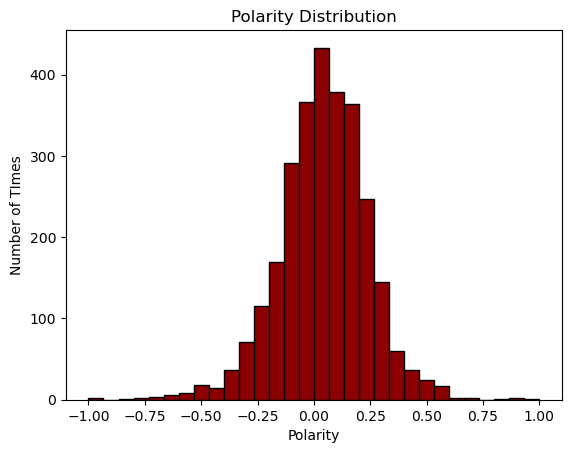

In [17]:
#Polarity Distribution for dffilter
# plot histogram for polarity keeping default as density=False
plt.hist(dffilter['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
# If density=True, the first element of the return tuple will be the counts normalized to form a probability density, i.e., the area (or integral) under the histogram will sum to 1. This is achieved by dividing the count by the number of observations times the bin width and not dividing by the total number of observations. If stacked is also True, the sum of the histograms is normalized to 1.

plt.title('Polarity Distribution')
plt.xlabel("Polarity") # label x-axis as Polarity
plt.ylabel("Number of TImes") # label y-axis as Number of Times

from pylab import rcParams
# rcParams changes the default parameters -> Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt.
rcParams['figure.figsize'] = 5,5

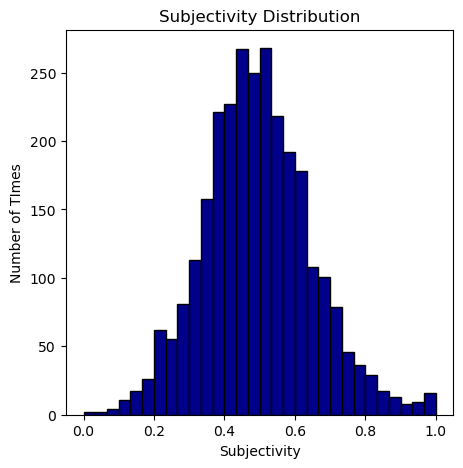

In [18]:
#Polarity Distribution for dffilter
# plot histogram for polarity keeping default as density=False
plt.hist(dffilter['subjectivity'], color = 'darkblue', edgecolor = 'black', density=False,
         bins = int(30))
# If density=True, the first element of the return tuple will be the counts normalized to form a probability density, i.e., the area (or integral) under the histogram will sum to 1. This is achieved by dividing the count by the number of observations times the bin width and not dividing by the total number of observations. If stacked is also True, the sum of the histograms is normalized to 1.

plt.title('Subjectivity Distribution')
plt.xlabel("Subjectivity") # label x-axis as Polarity
plt.ylabel("Number of TImes") # label y-axis as Number of Times

from pylab import rcParams
# rcParams changes the default parameters -> Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt.
rcParams['figure.figsize'] = 5,5

In [19]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [20]:
stopwords = nltk.corpus.stopwords.words('english')

In [21]:
# REmove stopwords: pandas.Series.str.replace
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# refer to regex: https://docs.python.org/3.1/library/re.html

# exclude stopwords using pandas.Series.str.replace
words = (data3.text
           .str.lower()           # convert the sentiments to lower case
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
            # str.replace to perform string or regex substitution on series of string data as above
                     # replace the two character string having '\' and '|' with ' '
                          # replace the two character string having '\' and '&' with ''
                                # replace the two chracter string having '\' and '-' with ''
                                      # replace the two chracter string having '\' and '.' with ''
                                             # replace the two chracter string having '\' and ',' with ''
                                                 # replace the two chracter string having '\' and ''' with ''
                                                         # replace RE_stopwords with ''
           .str.cat(sep=' ') #concatenate strings in pandas with separator put in between
           .split() # string.split() returns a list of strings after breaking the given string by the specified separator
)

In [22]:
# Word Frequency of words from above
from collections import Counter

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10), # 10 most common words
                    columns=['Word', 'Frequency']).set_index('Word')
rslt

,Frequency
Word,
’,1605
im,1328
like,1160
get,847
know,837
feel,759
would,753
dont,742
time,742


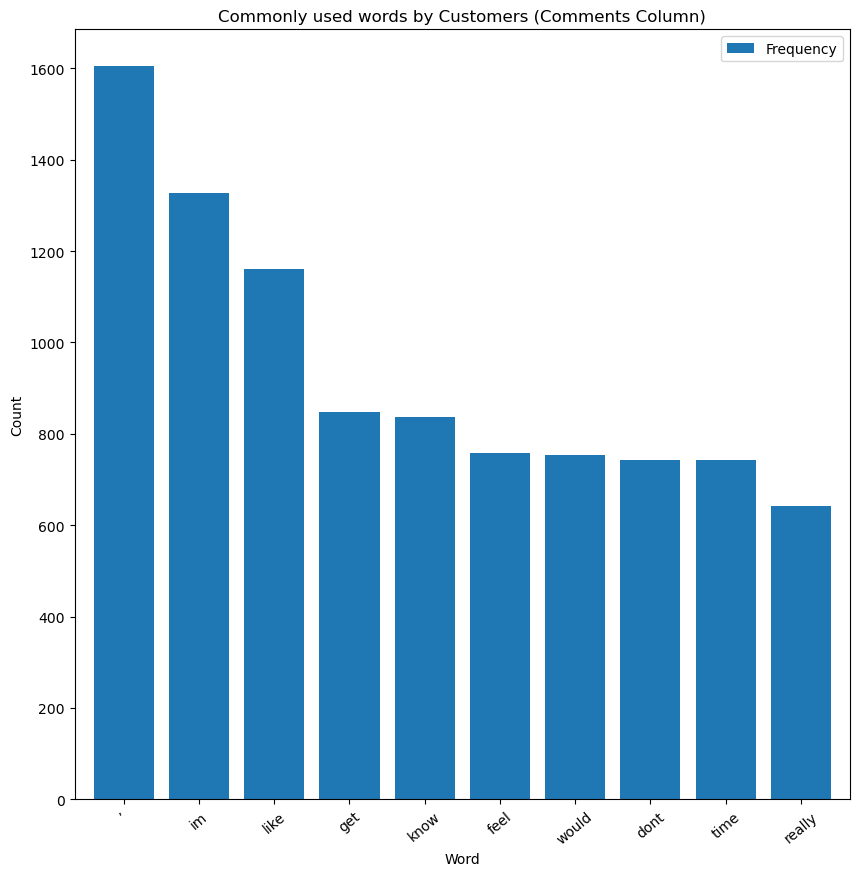

In [23]:
rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100),
                    columns=['Word', 'Frequency'])
#BAR CHART of 10 commonly used words by customers 
rslt.plot.bar(rot=40, figsize=(10,10), width=0.8,colormap='tab10')
plt.title("Commonly used words by Customers (Comments Column)")
plt.ylabel("Count")

from pylab import rcParams
rcParams['figure.figsize'] = 5,5

<AxesSubplot:xlabel='count', ylabel='subreddit'>

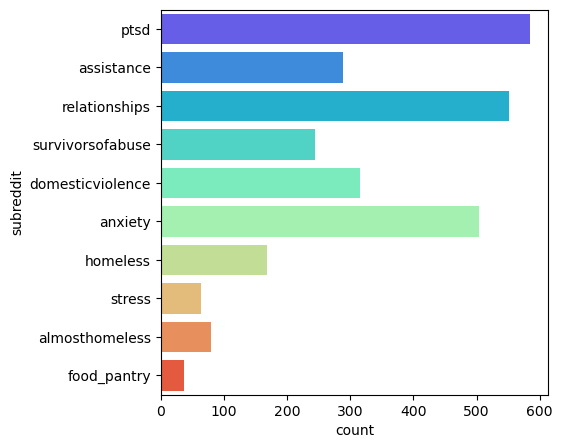

In [24]:
sns.countplot(y='subreddit',data=data , palette = 'rainbow')

In [25]:
print(data.columns)
print(data.shape)

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)
(2838, 116)


In [26]:
print(data_test.columns)
print(data_test.shape)

Index(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)
(715, 116)


In [27]:
#categorical columns
data.select_dtypes(include=['object']).columns.tolist()

['subreddit', 'post_id', 'sentence_range', 'text']

In [28]:
data_test.select_dtypes(include=['object']).columns.tolist()

['subreddit', 'post_id', 'sentence_range', 'text']

In [29]:
data.subreddit.value_counts() #my y variable

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

In [30]:
data = data.drop(['post_id', 'sentence_range', 'id'], axis = 1)
data_test = data_test.drop(['post_id', 'sentence_range', 'id'], axis = 1)

In [31]:
data3 = pd.concat([data,data_test],axis=0,ignore_index=True) 
data3 = data3.sample(frac = 1).reset_index(drop = True)
data3.head()

,subreddit,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,anxiety,"My heart races and my hands start to sweat, I ...",1,1.000000,1.529571e+09,4,2.085465,96,16.07,5.92,...,1.0000,1.0000,1.0,1.69358,1.44235,1.86527,1.00,4,3.105646,-0.153333
1,ptsd,"It started again, but worse. I'd bring up the ...",0,1.000000,1.536476e+09,1,-1.020667,43,1.50,75.74,...,1.1429,1.1429,1.0,1.81425,1.56098,1.85167,0.67,4,1.817778,-0.200000
2,ptsd,He doesn’t know anything about that though. Fo...,0,0.600000,1.541373e+09,4,6.866136,160,5.82,69.14,...,1.0000,1.1250,1.0,1.74363,1.58592,1.89757,0.99,6,6.685265,0.153333
3,food_pantry,I ask out of hope that someone will understand...,0,0.571429,1.521350e+09,4,1.125977,25,62.61,65.56,...,1.4545,1.2000,1.0,1.78548,1.29474,1.97125,0.67,9,2.163966,0.445238
4,domesticviolence,"He speeds up and tries to catch up to her, and...",0,0.833333,1.538345e+09,4,7.366712,135,40.97,72.32,...,1.1000,1.1429,1.0,1.75929,1.58319,1.84228,1.00,5,7.778319,0.031250


In [32]:
from sklearn.preprocessing import LabelEncoder #dummification of y var
le = LabelEncoder()
data3['subreddit'] = le.fit_transform(data3['subreddit'])

In [33]:
data3.head()

,subreddit,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,1,"My heart races and my hands start to sweat, I ...",1,1.000000,1.529571e+09,4,2.085465,96,16.07,5.92,...,1.0000,1.0000,1.0,1.69358,1.44235,1.86527,1.00,4,3.105646,-0.153333
1,6,"It started again, but worse. I'd bring up the ...",0,1.000000,1.536476e+09,1,-1.020667,43,1.50,75.74,...,1.1429,1.1429,1.0,1.81425,1.56098,1.85167,0.67,4,1.817778,-0.200000
2,6,He doesn’t know anything about that though. Fo...,0,0.600000,1.541373e+09,4,6.866136,160,5.82,69.14,...,1.0000,1.1250,1.0,1.74363,1.58592,1.89757,0.99,6,6.685265,0.153333
3,4,I ask out of hope that someone will understand...,0,0.571429,1.521350e+09,4,1.125977,25,62.61,65.56,...,1.4545,1.2000,1.0,1.78548,1.29474,1.97125,0.67,9,2.163966,0.445238
4,3,"He speeds up and tries to catch up to her, and...",0,0.833333,1.538345e+09,4,7.366712,135,40.97,72.32,...,1.1000,1.1429,1.0,1.75929,1.58319,1.84228,1.00,5,7.778319,0.031250


In [34]:
data3.corr().abs()['label'].sort_values(ascending = False)[:30] #corelation

label                       1.000000
lex_liwc_Tone               0.450479
lex_liwc_negemo             0.394988
lex_liwc_Clout              0.392516
lex_liwc_i                  0.387434
sentiment                   0.307780
lex_dal_min_pleasantness    0.290220
lex_liwc_posemo             0.288324
lex_liwc_anx                0.271179
lex_liwc_Authentic          0.266833
lex_liwc_social             0.245331
lex_liwc_Analytic           0.233978
lex_liwc_function           0.227150
lex_liwc_Dic                0.227076
lex_liwc_anger              0.217469
lex_liwc_you                0.211981
lex_liwc_feel               0.203389
lex_liwc_sad                0.202216
lex_liwc_affiliation        0.184311
lex_liwc_ppron              0.178081
lex_liwc_negate             0.177613
lex_liwc_Apostro            0.172879
lex_liwc_risk               0.172531
lex_liwc_pronoun            0.171689
lex_dal_avg_pleasantness    0.170962
lex_liwc_focuspresent       0.169931
lex_liwc_swear              0.165632
l

In [35]:
!pip install transformers

In [36]:
import tensorflow as tf
import transformers
import tqdm
from keras.preprocessing import sequence

#creating a function
def func_tokenizer(tokenizer_name, docs):
    features = []
    for doc in tqdm.tqdm(docs, desc = 'converting documents to features'):
        tokens = tokenizer_name.tokenize(doc)
        ids = tokenizer_name.convert_tokens_to_ids(tokens)
        features.append(ids)
    return features
print("The function is created successfully")

The function is created successfully


In [37]:
#Initialize bert tokenizer
bert_tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased')

X,y = data3[['text', 'lex_liwc_Tone', 'lex_liwc_negemo', 'lex_liwc_Clout','lex_liwc_i', 'sentiment' ]], data3['label']
bert_features = func_tokenizer(bert_tokenizer, X['text'])

converting documents to features: 100%|███████████████████████████████████████████| 3553/3553 [00:11<00:00, 299.48it/s]


In [38]:
from keras_preprocessing.sequence import pad_sequences

In [39]:
bert_trg = pad_sequences(bert_features, maxlen = 500)

In [40]:
X = pd.DataFrame(bert_trg)

X = X.assign(lex_liwc_negemo = data3['lex_liwc_negemo'].values)
X = X.assign(lex_liwc_Tone= data3['lex_liwc_Tone'].values)
X = X.assign(lex_liwc_Clout = data3['lex_liwc_Clout'].values)
X = X.assign(lex_liwc_i = data3['lex_liwc_i'].values)
X = X.assign(sentiment = data3['sentiment'].values)
X = X.assign(lex_dal_min_pleasantness = data3['lex_dal_min_pleasantness'].values)
X = X.assign(lex_liwc_posemo = data3['lex_liwc_posemo'].values)
X = X.assign(lex_liwc_anx = data3['lex_liwc_anx'].values)
X = X.assign(lex_liwc_Authentic = data3['lex_liwc_Authentic'].values)
X = X.assign(lex_liwc_social = data3['lex_liwc_social'].values)
X = X.assign(lex_liwc_Analytic = data3['lex_liwc_Analytic'].values)
X = X.assign(lex_liwc_function = data3['lex_liwc_function'].values)
X = X.assign(lex_liwc_Dic = data3['lex_liwc_Dic'].values)


In [41]:
X

,0,1,2,3,4,5,6,7,8,9,...,lex_liwc_i,sentiment,lex_dal_min_pleasantness,lex_liwc_posemo,lex_liwc_anx,lex_liwc_Authentic,lex_liwc_social,lex_liwc_Analytic,lex_liwc_function,lex_liwc_Dic
0,0,0,0,0,0,0,0,0,0,0,...,13.54,-0.153333,1.0000,3.12,2.08,98.01,2.08,16.07,61.46,92.71
1,0,0,0,0,0,0,0,0,0,0,...,16.28,-0.200000,1.1429,0.00,0.00,87.51,23.26,1.50,62.79,95.35
2,0,0,0,0,0,0,0,0,0,0,...,10.62,0.153333,1.0000,3.75,0.62,24.58,17.50,5.82,66.88,95.62
3,0,0,0,0,0,0,0,0,0,0,...,4.00,0.445238,1.4545,8.00,0.00,43.37,12.00,62.61,40.00,72.00
4,0,0,0,0,0,0,0,0,0,0,...,2.96,0.031250,1.1000,0.00,0.00,75.74,17.04,40.97,68.15,99.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0,0,0,0,0,0,0,0,0,0,...,9.23,0.043480,1.0000,1.03,0.51,84.86,10.26,17.02,56.92,90.77
3549,0,0,0,0,0,0,0,0,0,0,...,7.07,0.200000,1.0000,3.03,0.00,91.64,12.12,16.13,58.59,94.95
3550,0,0,0,0,0,0,0,0,0,0,...,10.67,-0.312500,1.0000,1.33,0.00,98.01,2.67,66.17,54.67,81.33
3551,0,0,0,0,0,0,0,0,0,0,...,12.50,0.157143,1.0000,3.12,0.00,55.79,12.50,52.02,58.33,88.54


In [42]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [43]:
def mlmodels():
    
    models = dict()
    models['lr'] = make_pipeline(StandardScaler(),LogisticRegression(solver = 'saga', C = 70.0))
    models['knn'] = make_pipeline(StandardScaler(),KNeighborsClassifier())
    models['cart'] = DecisionTreeClassifier(max_depth = 1)
    models['svm'] = make_pipeline(StandardScaler(),SVC())
    models['bayes'] = make_pipeline(StandardScaler(), GaussianNB())
    models['xgboost'] = XGBClassifier(n_estimators = 11, max_depth = 1)
    models['GBM'] = GradientBoostingClassifier(n_estimators = 10)
    models['rf'] = RandomForestClassifier(n_estimators = 10)
    models['adaboost'] = AdaBoostClassifier(n_estimators= 12)
    
    return models

In [44]:
# evaluate a given model using cross-validation
def evalmodel(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)
	scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>lr 0.76 (0.02)
>knn 0.65 (0.03)
>cart 0.74 (0.02)
>svm 0.76 (0.02)
>bayes 0.07 (0.02)
>xgboost 0.75 (0.02)
>GBM 0.76 (0.02)
>rf 0.69 (0.02)
>adaboost 0.75 (0.02)


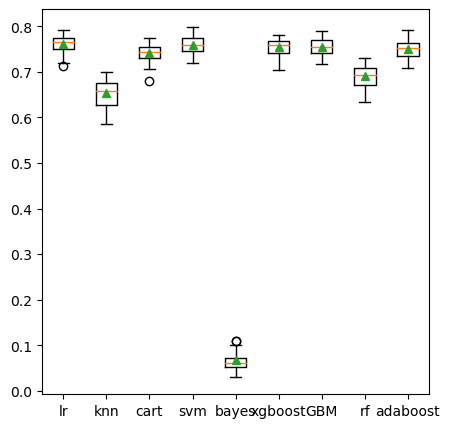

In [45]:
from numpy import mean
from numpy import std

# get the models to evaluate
models = mlmodels()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evalmodel(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.2f (%.2f)' % (name, scores.mean(), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()


In [46]:
# evaluate a given model using cross-validation for precision
def evalmodel2(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)
	scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [47]:
## get the models to evaluate for the precision
models = mlmodels()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evalmodel2(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.2f (%.2f)' % (name, scores.mean(), std(scores)))

>lr 0.75 (0.02)
>knn 0.67 (0.03)
>cart 0.68 (0.02)
>svm 0.72 (0.02)
>bayes 0.76 (0.12)
>xgboost 0.74 (0.02)
>GBM 0.73 (0.02)
>rf 0.73 (0.02)
>adaboost 0.74 (0.02)


In [48]:
# evaluate a given model using cross-validation for recall
def evalmodel3(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)
	scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [49]:
# get the models to evaluate the recall values
models = mlmodels()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evalmodel3(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.2f (%.2f)' % (name, scores.mean(), std(scores)))

>lr 0.78 (0.03)
>knn 0.64 (0.03)
>cart 0.81 (0.03)
>svm 0.80 (0.03)
>bayes 0.04 (0.01)
>xgboost 0.77 (0.03)
>GBM 0.78 (0.03)
>rf 0.66 (0.03)
>adaboost 0.77 (0.03)


In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
# evaluate a given model using cross-validation
def cm(model, X, y):
	model.fit(X,y)
	ypred = model.predict(X)
	cm = confusion_matrix(y,ypred)
	return cm

In [54]:
# get the models to evaluate
models = mlmodels()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	cm1 = cm(model, X, y)
	results.append(cm1)
	print(name,cm1)

lr [[1246  450]
 [ 380 1477]]
knn [[1338  358]
 [ 435 1422]]
cart [[ 994  702]
 [ 340 1517]]
svm [[1332  364]
 [ 274 1583]]
bayes [[1684   12]
 [1791   66]]
xgboost [[1235  461]
 [ 434 1423]]
GBM [[1205  491]
 [ 347 1510]]
rf [[1677   19]
 [  31 1826]]
adaboost [[1186  510]
 [ 385 1472]]
